## Loading in Data ##

In [1]:
# - Title -
# Housing Prices Competition

# - Goal -
# It is your job to predict the sales price for each house. 
# For each Id in the test set, you must predict the value of the SalePrice variable. 

# - Dataset -
# 'Train.csv' – training set
# 'Test.csv' – the test set


# - Important findings -


# - Next steps -

In [2]:
# - What am I doing? -
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [3]:
# - What am I doing? -
# Load in data for training and testing model.

# 1. Create path to training data
train_path_name = "/kaggle/input/home-data-for-ml-course/train.csv"

# 2. Create path to testing data
test_path_name = "/kaggle/input/home-data-for-ml-course/test.csv"


# 3. Read in training data
train_df = pd.read_csv(train_path_name)

# 4. Read in testing data
test_df = pd.read_csv(test_path_name)

# Print training column names
print(train_df.columns)

# Print testing column names
print(test_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# - What am I doing? -
# Apply hot encoding (Transform string to variable equivalent) for categorical columns to testing data.

# List out the categorical columns in the data to hot encode.
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']


# Apply get_dummies function to transform specified columns
train_df_encoded = pd.get_dummies(train_df, columns=categorical_columns, prefix=categorical_columns)

In [5]:
# - What am I doing? -
# Apply hot encoding (Transform string to variable equivalent) for categorical columns to testing data.

# List out the categorical columns in the data to hot encode.
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

# Apply get_dummies function to transform specified columns
test_df_encoded = pd.get_dummies(test_df, columns=categorical_columns, prefix=categorical_columns)

# Do not limit columns
pd.options.display.max_columns = None

## Data Exploration ##

In [6]:
# - What am I doing? -
# Picking specific columns to use in model according to reserach done in exploratory phase. I picked columns with strong correlations to sales price.

# 1. Pick specific columns in training and testing data.
train_df_encoded = train_df_encoded[['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'SalePrice']]
test_df_encoded = test_df_encoded[['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA']]

# 2. Get info function on 'housing' dataset
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Id              1460 non-null   int64
 1   OverallQual     1460 non-null   int64
 2   YearBuilt       1460 non-null   int64
 3   YearRemodAdd    1460 non-null   int64
 4   TotalBsmtSF     1460 non-null   int64
 5   1stFlrSF        1460 non-null   int64
 6   GrLivArea       1460 non-null   int64
 7   FullBath        1460 non-null   int64
 8   TotRmsAbvGrd    1460 non-null   int64
 9   GarageCars      1460 non-null   int64
 10  ExterQual_TA    1460 non-null   bool 
 11  BsmtQual_Ex     1460 non-null   bool 
 12  KitchenQual_Ex  1460 non-null   bool 
 13  KitchenQual_TA  1460 non-null   bool 
 14  SalePrice       1460 non-null   int64
dtypes: bool(4), int64(11)
memory usage: 131.3 KB


In [7]:
# - What am I doing? -
# Look at columns with specific data types (float64(5), int64(13), object(6)).

# 1. Call info function on 'housing' dataset
train_df_encoded.select_dtypes(include='object').columns

Index([], dtype='object')

In [8]:
# - What am I doing? -
# Generate descriptive statistics to learn about 'housing' dataset.

# 1. Display all columns
pd.options.display.max_columns = None
# 2. Call describe function on 'housing' dataset.
train_df_encoded.describe()

,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,180921.195890
std,421.610009,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,79442.502883
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,34900.000000
25%,365.750000,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,129975.000000
50%,730.500000,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,163000.000000
75%,1095.250000,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,214000.000000
max,1460.000000,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,755000.000000


In [9]:
# - What am I doing? -
# Looking at null values of columns for 'housing' dataset.

# 1. Display all rows
pd.options.display.max_rows = None

# 2. Call null function on dataset.
train_df_encoded.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
ExterQual_TA      0
BsmtQual_Ex       0
KitchenQual_Ex    0
KitchenQual_TA    0
SalePrice         0
dtype: int64

In [10]:
# - What am I doing? -
# Showing how many unique values are in columns for 'housing' dataset.

train_df_encoded.nunique()

Id                1460
OverallQual         10
YearBuilt          112
YearRemodAdd        61
TotalBsmtSF        721
1stFlrSF           753
GrLivArea          861
FullBath             4
TotRmsAbvGrd        12
GarageCars           5
ExterQual_TA         2
BsmtQual_Ex          2
KitchenQual_Ex       2
KitchenQual_TA       2
SalePrice          663
dtype: int64

In [11]:
# - What am I doing? -
# Look at sorted data for 'housing' dataset.

# Don't put cap on number of columns shown.
pd.options.display.max_columns = None

# Sort data by column name
train_df_encoded.sort_values(by='FullBath', ascending=False).head(20)

,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,SalePrice
529,530,6,1957,1975,2035,2515,2515,3,9,2,False,False,False,True,200624
738,739,5,1987,1988,1200,1200,1200,3,5,0,True,False,False,True,179000
1182,1183,10,1996,1996,2396,2411,4476,3,10,3,False,True,True,False,745000
118,119,7,1990,1990,1673,1699,3222,3,11,3,True,False,False,False,320000
798,799,9,2008,2009,1926,1966,3140,3,11,3,False,True,True,False,485000
496,497,8,1992,1993,3200,3228,3228,3,10,2,False,False,False,False,430000
583,584,10,1893,2000,1237,1521,2775,3,9,2,False,False,False,False,325000
35,36,8,2004,2005,1117,1132,2452,3,9,3,False,True,False,False,309000
304,305,7,1880,2002,1470,1675,3493,3,10,3,True,False,False,False,295000
803,804,9,2008,2009,1734,1734,2822,3,12,3,False,True,True,False,582933


In [12]:
# - What am I doing? -
# Looking at correlations between numeric values.

# 1. Call correlation function on dataframe.
train_df_encoded.corr()

,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,SalePrice
Id,1.000000,-0.028365,-0.012713,-0.021998,-0.015415,0.010496,0.008273,0.005587,0.027239,0.016570,-0.011072,-0.048586,-0.004092,-0.014973,-0.021917
OverallQual,-0.028365,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,-0.646247,0.470780,0.425750,-0.553891,0.790982
YearBuilt,-0.012713,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,-0.589126,0.319394,0.204430,-0.459792,0.522897
YearRemodAdd,-0.021998,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,-0.565424,0.286165,0.237868,-0.576964,0.507101
TotalBsmtSF,-0.015415,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,-0.390398,0.403166,0.360271,-0.311190,0.613581
1stFlrSF,0.010496,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,-0.312844,0.377387,0.347257,-0.273566,0.605852
GrLivArea,0.008273,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,-0.386146,0.309962,0.306604,-0.350179,0.708624
FullBath,0.005587,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,-0.466339,0.237403,0.174759,-0.418698,0.560664
TotRmsAbvGrd,0.027239,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,-0.242485,0.240581,0.247358,-0.210428,0.533723
GarageCars,0.016570,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,-0.481825,0.356425,0.273275,-0.399449,0.640409


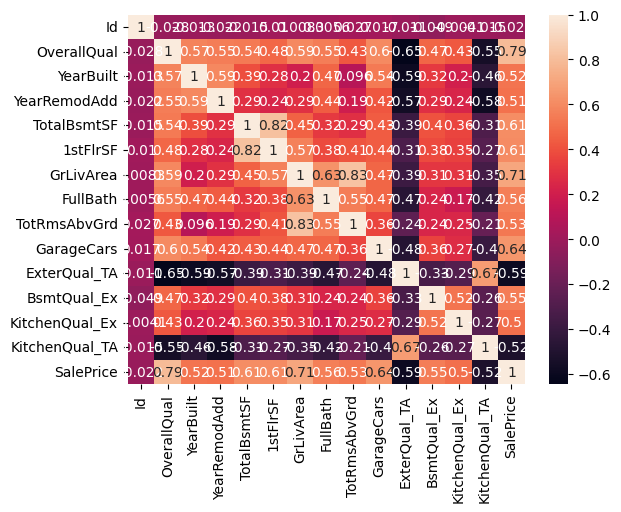

In [13]:
# - What am I doing? -
# Visualize correlations for housing dataset.
# Good step to understand what your focus should be on during data analysis.

# 1. Apply heatmap function with seaborn.
sns.heatmap(train_df_encoded.corr(), annot=True)

# 2. Apply the size of the graph.
plt.rcParams['figure.figsize'] = (10, 10)

# 3. Plot the points and show.
plt.show()

In [14]:
# - What am I doing? -
# Group columns to look at 'housing' dataset closer.

# 1. Call group by and run aggregation function to learn more.
train_df_encoded.groupby('YearBuilt').sum().sort_values(by='SalePrice', ascending=False).head(50)

,Id,OverallQual,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,SalePrice
YearBuilt,,,,,,,,,,,,,,
2006,52205,507,134423,90854,91876,112253,132,468,167,5,21,12,3,16868955
2005,50670,453,128354,76979,79543,103772,124,437,145,8,12,10,6,14699581
2007,33947,379,98358,71068,71624,84351,98,350,123,2,20,14,1,12512774
2004,34711,383,108241,63843,64017,85156,101,353,116,4,12,3,1,11358777
2003,30338,322,90152,53218,53130,75645,85,310,99,3,9,7,1,10233386
2008,20009,199,46191,43305,41436,49292,47,192,63,0,16,17,0,8023530
1998,17856,174,49957,28240,28840,44849,49,174,52,13,4,0,9,5511250
1976,23751,194,65320,33947,38536,49167,56,221,62,28,0,0,26,5406455
1977,24987,183,63407,34123,40546,48017,55,213,57,29,0,1,23,5339550


<Axes: >

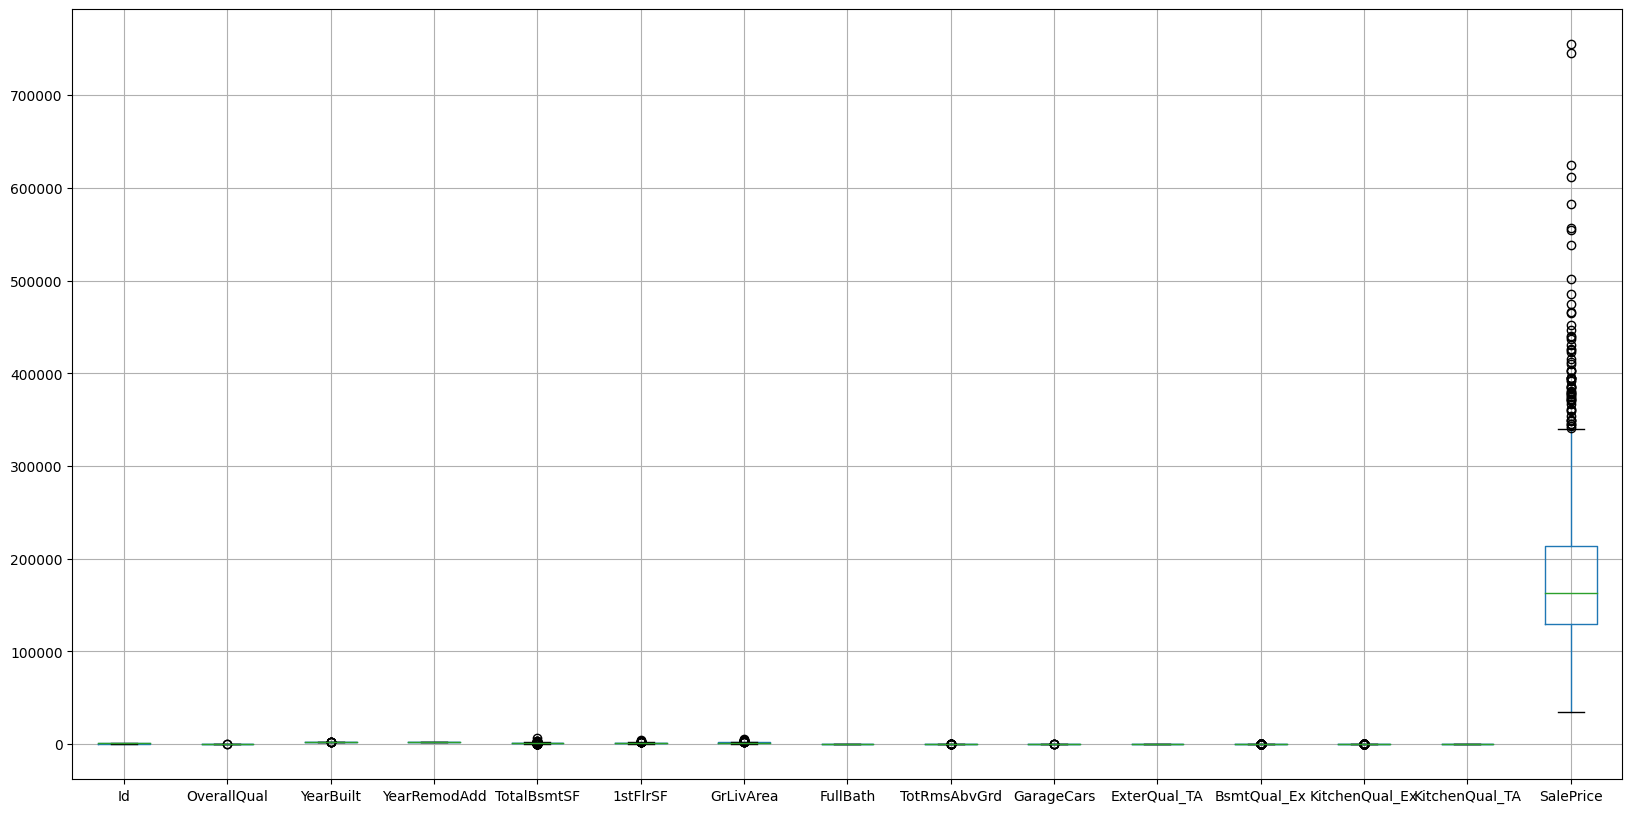

In [15]:
# - What am I doing? -
# Look at boxplots to find outliers.


# 1. Call boxplot function.
train_df_encoded.boxplot(figsize=(20,10))

## Creating the Random Forest Model ##

In [16]:
# - What am I doing? -
# Preparing Features and predictor for testing and training data.

# 1. Create a Series with training column we want to predict for house prices
y = train_df_encoded['SalePrice']

# 2. Training Columns used as features to predict price.
train_house_Features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'ExterQual_TA',
       'BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA']

# 3. Create the Feature variable for training
X = train_df_encoded[train_house_Features]

# 4. # Testing Columns used as features to predict price.
test_house_Features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'ExterQual_TA',
       'BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA']

# 5. Create the Feature variable for testing
X_test = test_df_encoded[test_house_Features]

# 6. Replace the few NaN values that exist with 0.
X_test = X_test.fillna(0)

In [17]:
# - What am I doing? -
# Look at null values

# 1. Run isnull function.
X_test.isnull().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
ExterQual_TA      0
BsmtQual_Ex       0
KitchenQual_Ex    0
KitchenQual_TA    0
dtype: int64

In [18]:
# - What am I doing? -
# Loading in necessary packages for Random Forest model and make predictions.


# Import functions for Random Forest Model and Mean Absolute Error and trainTestSplit
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split


# Create Random Forest Model
forest_model = RandomForestRegressor(random_state=0)

# Train Model with training data
forest_model.fit(X, y)

# Predict prices for houses
house_pred = forest_model.predict(X_test)


In [19]:
# - What am I doing? -
# Submitting results to Competition in approved format.

# Creating dataframe with approved format and data
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': house_pred})

# Creating CSV with dataframe.
output.to_csv('submission.csv', index=False)
print('Your submissions was successfully saved!')

Your submissions was successfully saved!
